# TRABAJO PRÁCTICO 1: Análisis Exploratorio de Datos

### Análisis realizado
- [Click's_por_hora](#link_1)
- [Posicion_click's](#link_2)
- [Instalaciones_atribuidas_Jampp](#link_3)
- [Tipos_instalaciones](#link_4)
- [Horario_instalaciones](#link_5)
- [Análisis_aplicación](#link_6)
- [Instalaciones_wifi](#link_7)
- [Cantidad_subastas_por_dispositivo](#link_8)


In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import numpy as np

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importo los dataframes ya limpios utilizando los otros notebooks
#Los dataframes se van a llamar: clicks,auctions,installs y events
%run Limpieza_Clicks.ipynb
%run Limpieza_Auctions.ipynb
%run Limpieza_Installs.ipynb
%run Limpieza_Events.ipynb

In [3]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755000+00:00,6333597102633388268,1.205689,1.070234,False,1,iGgClCM9exiHF4K31g94XmvHEBSLKIY,inf,NaN,inf,2733035977666442898,NaN,1.563477,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641000+00:00,6333597102633388268,1.218924,1.071209,False,4,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,inf,NaN,inf,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069000+00:00,6333597102633388268,1.205689,1.070234,False,6,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,inf,NaN,inf,392184377613098015,NaN,NaN,0.945801,0.472900,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543000+00:00,6333597102633388268,1.205689,1.070234,False,45,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,inf,NaN,inf,2733035977666442898,NaN,19.015625,0.035004,0.430908,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570000+00:00,6333597102633388268,1.205689,1.070234,False,45,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,inf,NaN,inf,2733035977666442898,NaN,28.109375,0.053986,0.423096,1891515180541284343,4368617728156436525


In [4]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,685400811232710215,3.301378e+18


In [7]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


## Exploracion De Datos

<a id='link_1'></a>
### Cantidad de clicks realizados dependiendo de la hora

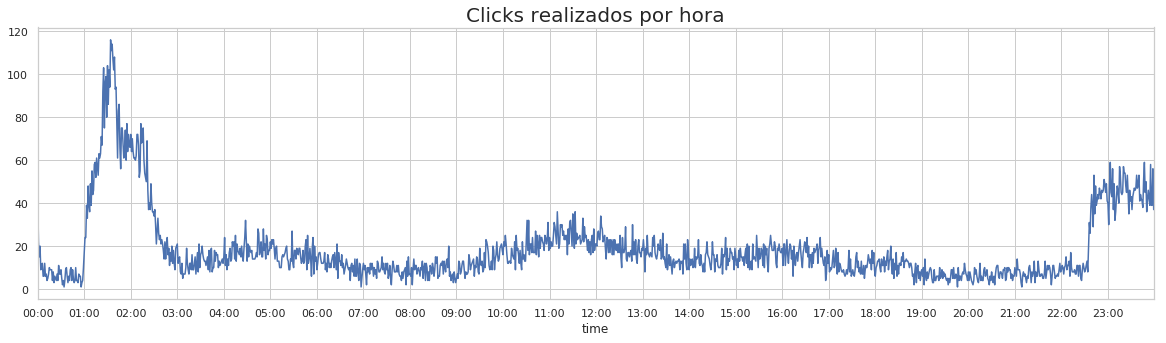

In [8]:
clicks['created'].dt.round("min").dt.time.value_counts().sort_index().plot(kind='line',figsize=(20,5), grid=True);
horas = [datetime.time(i) for i in range(24)]
plt.title("Clicks realizados por hora", size=20);
plt.xticks(horas);

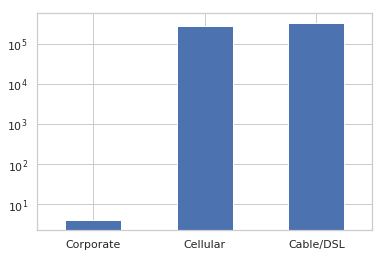

In [9]:
events['connection_type'].value_counts().sort_values().plot(logy=True,kind='bar',rot=0);

<a id='link_2'></a>
### En que posicion se realizan la mayor cantidad de clicks

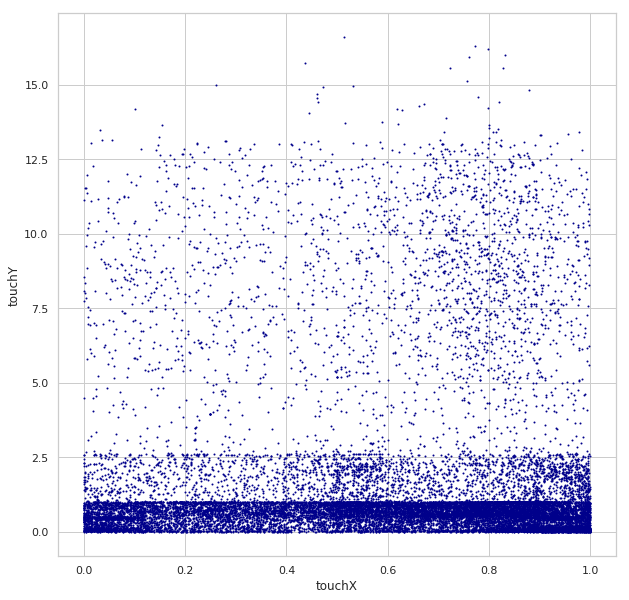

In [10]:
clicks.plot.scatter('touchX','touchY',s=1,c='DarkBlue', figsize=(10,10));

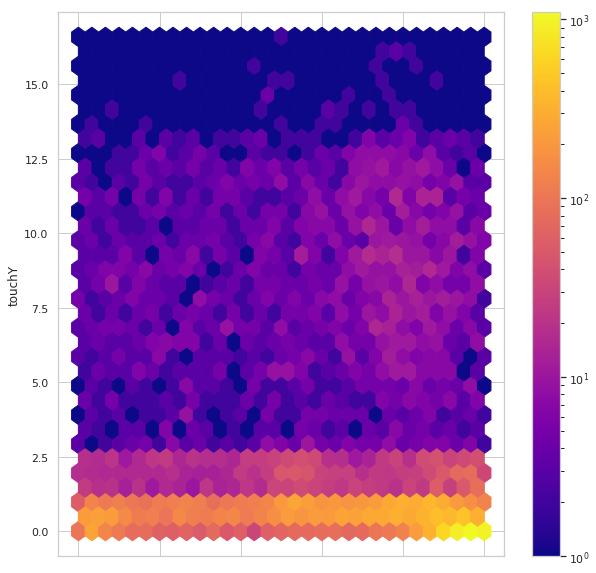

In [11]:
clicks.plot.hexbin('touchX','touchY', gridsize=30, figsize=(10,10),cmap="plasma",bins='log');

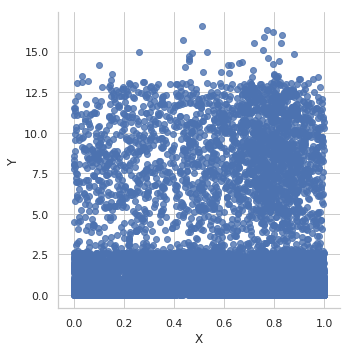

In [12]:
g = sns.lmplot(x="touchX",y="touchY",data=clicks,fit_reg=False)
g = g.set_axis_labels("X", "Y")

<a id='link_3'></a>
### Que instalaciones se registran gracias a Jampp

In [24]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [26]:
installs.shape

(3412, 16)

<b>Resultado:</b> El set de datos dado, no contiene instalaciones que Jampp se las atribuya.

<a id='link_4'></a>
### Tipos de instalaciones

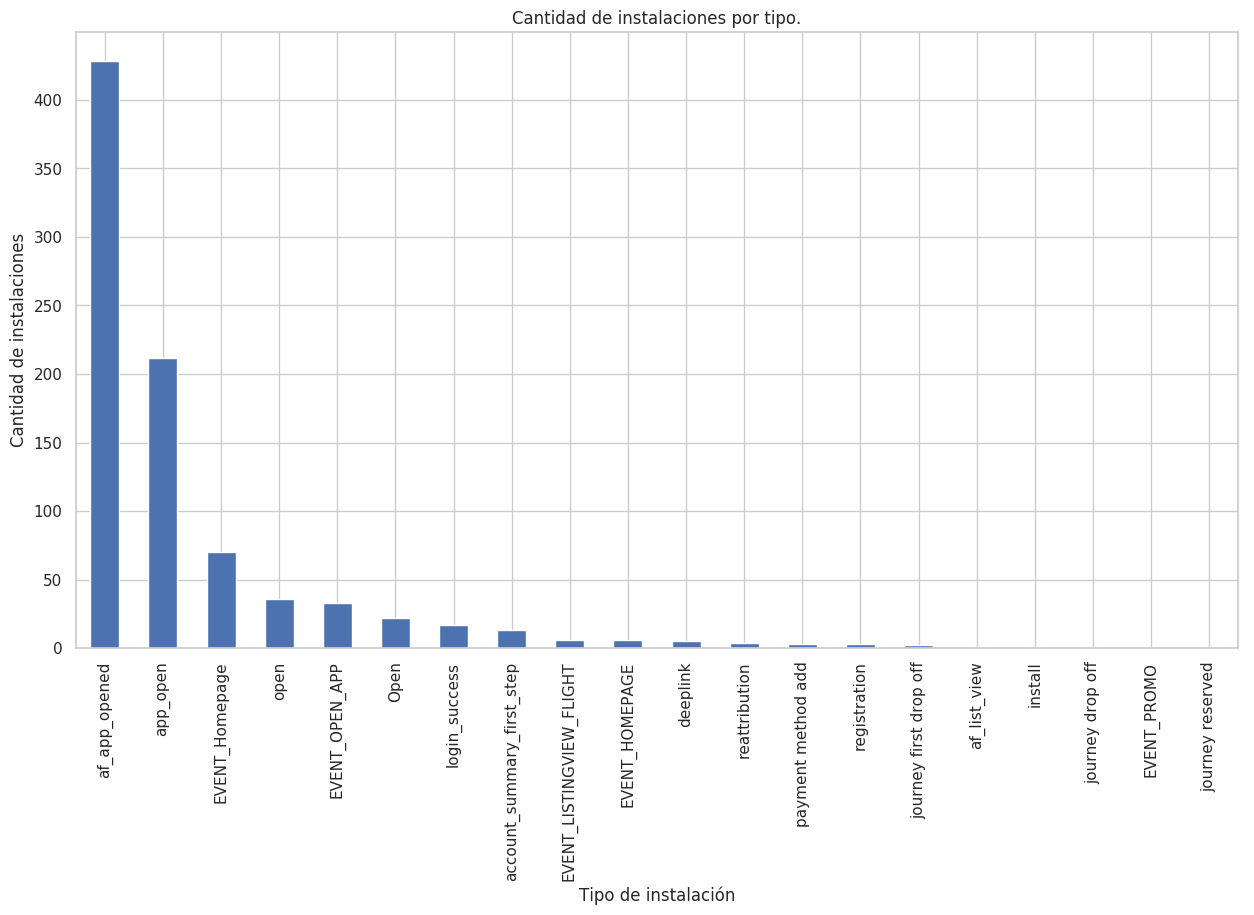

In [276]:
g=installs.groupby('kind').size().sort_values(ascending=False).plot(figsize=(15,8),kind='bar',rot=90,\
                                                            title='Cantidad de instalaciones por tipo.');
g.set_xlabel('Tipo de instalación');
g.set_ylabel('Cantidad de instalaciones');

Segun el json dado, kind es el tipo de instalacion, pero por los nombres que se leen, parece mas a tipos de eventos.. conclusion????????

<a id='link_5'></a>
### Horario de las instalaciones

In [277]:
installs['Week_day'] = installs['created'].dt.day_name().astype('category')
installs['Year'] = installs['created'].dt.year.astype('category')
installs['Month'] = installs['created'].dt.month.astype('category')
installs['Hour'] = installs['created'].dt.hour.astype('int8')

In [278]:
df = installs[['Week_day','Hour']].groupby(['Week_day','Hour']).size().reset_index(name='cantidad')\
    .set_index('Week_day')

df = df.pivot_table(values='cantidad', index=df.index, columns='Hour').fillna(value=0).astype('int8')

In [279]:
df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Saturday,17,25,19,14,10,5,5,4,4,2,...,15,26,16,28,24,26,20,20,18,20
Sunday,23,18,26,12,3,4,4,2,5,0,...,29,17,25,23,20,24,25,15,26,14
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15


In [280]:
days = {'Week_day': ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]}
days = pd.DataFrame(data=days)
df = pd.merge(days, df, on='Week_day', how='left')
df = df.set_index('Week_day')

In [281]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Tuesday,42,42,38,22,13,9,5,8,7,7,...,58,46,54,49,39,55,42,43,56,62
Wednesday,42,44,35,29,21,9,0,3,4,6,...,42,50,36,52,32,35,43,49,48,57
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26


Ahora esta ordenado en dias de la semana

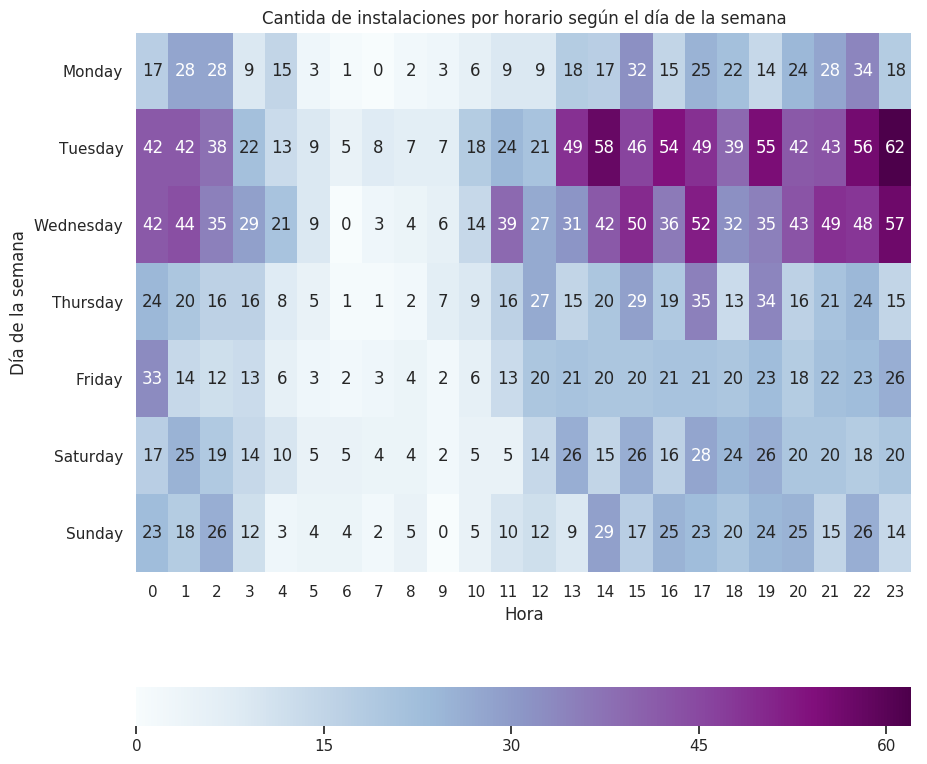

In [282]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df,ax=ax,cmap="BuPu",cbar_kws={"orientation": "horizontal"},annot=True);
plt.yticks(rotation=0);
plt.xlabel('Hora');
plt.ylabel('Día de la semana');
plt.title('Cantida de instalaciones por horario según el día de la semana');

In [184]:
installs['Month'].value_counts()

3    3412
Name: Month, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo.

In [185]:
installs['Year'].value_counts()

2019    3412
Name: Year, dtype: int64

<b>Nota:</b> En el set de datos dado, solo se tiene información del mes de Marzo y del año 2019.

In [186]:
del installs['Year']
del installs['Month']

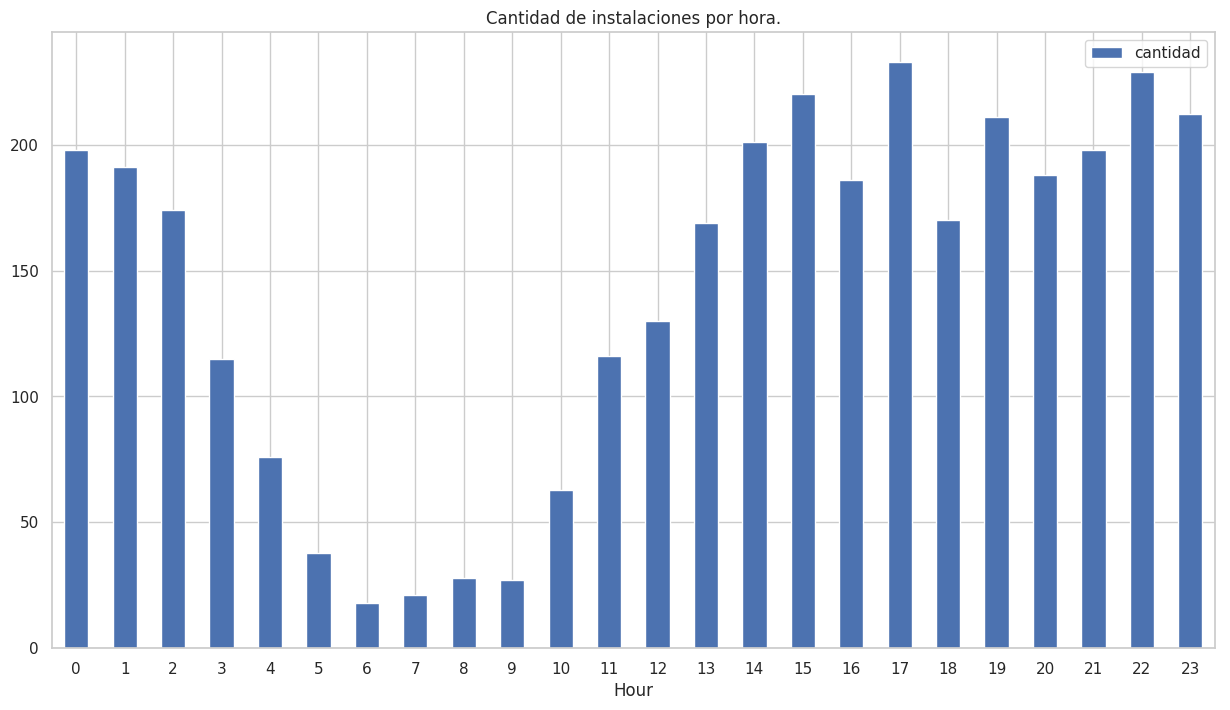

In [196]:
installs.groupby('Hour').size().reset_index(name='cantidad').set_index('Hour').plot(figsize=(15,8),kind='bar'\
                                                                ,rot=0,\
                                                                title='Cantidad de instalaciones por hora.');

<a id='link_6'></a>
### Analisis por aplicacion

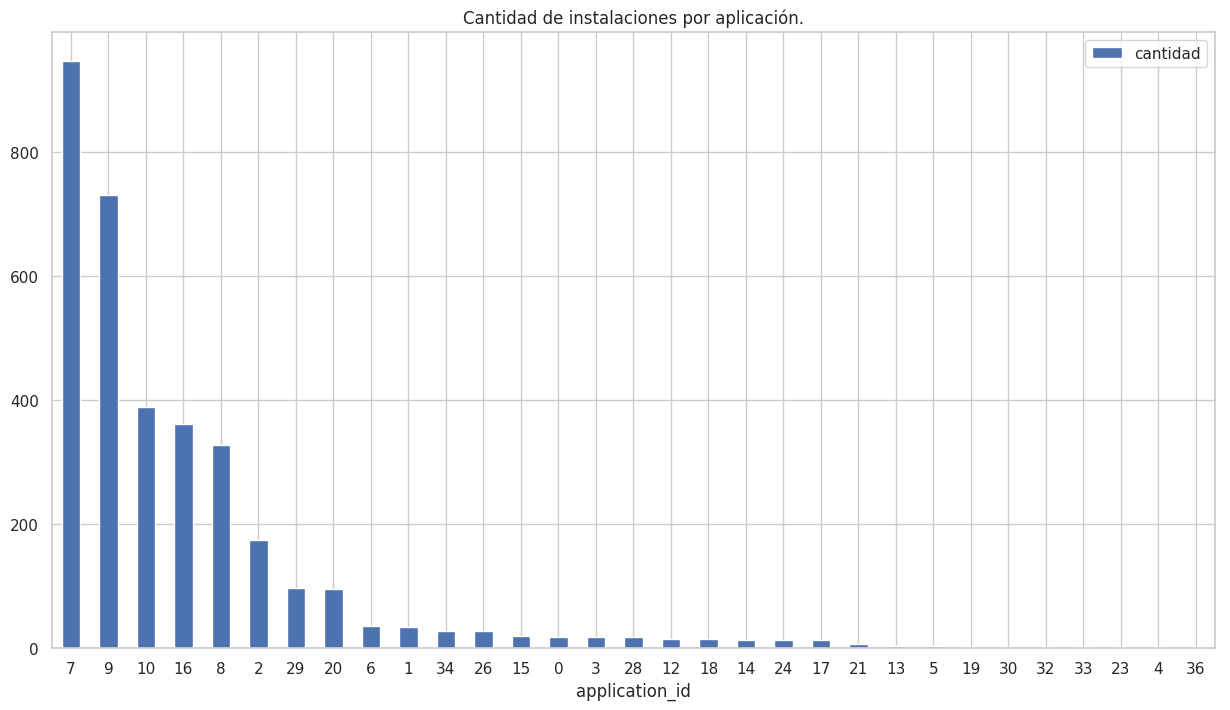

In [266]:
df = installs.groupby('application_id').size().reset_index(name='cantidad').\
    sort_values(by='cantidad',ascending=False).set_index('application_id')
df.plot(figsize=(15,8),kind='bar',rot=0,title='Cantidad de instalaciones por aplicación.');

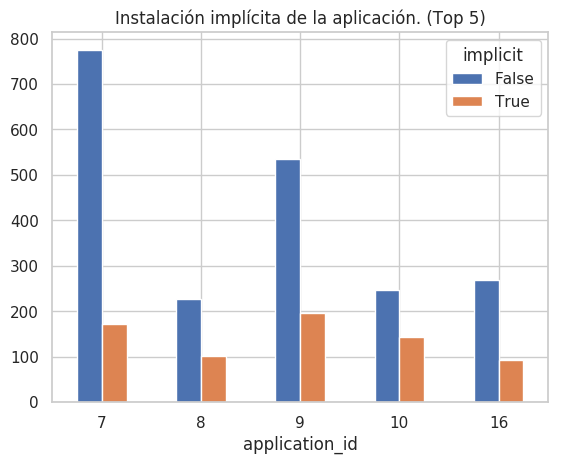

In [267]:
df = installs.loc[installs['application_id'].isin(df.head(5).index)].groupby(['application_id','implicit']).\
    size().reset_index(name='cantidad').set_index('application_id')

df= df.pivot_table(values='cantidad', index=df.index, columns='implicit')

df.plot(kind='bar',rot=0,title='Instalación implícita de la aplicación. (Top 5)');

<a id='link_7'></a>
### Instalaciones wifi

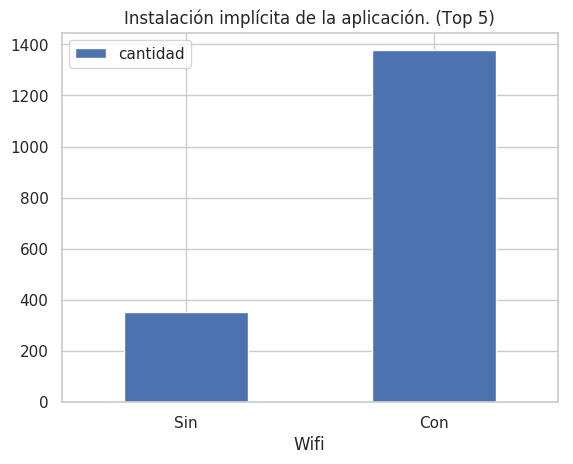

In [300]:
df = installs.groupby('wifi').size().reset_index(name='cantidad')
df['Wifi'] = np.where(df['wifi']==True, 'Con', 'Sin')
del df['wifi']
df = df.set_index('Wifi')
df.plot(kind='bar',rot=0,title='Instalación implícita de la aplicación. (Top 5)');

<a id='link_8'></a>
### En que dispositivos se realiza la mayor cantidad de subastas

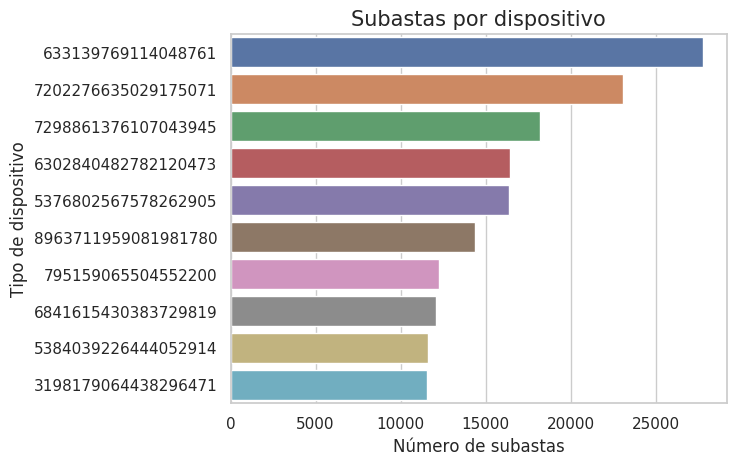

In [301]:
g = sns.barplot(x=auctions['device_id'].value_counts().head(10).values, 
                y=auctions['device_id'].value_counts().head(10).index, 
                order=auctions['device_id'].value_counts().head(10).index,orient='h')
g.set_title("Subastas por dispositivo", fontsize=15)
g.set_xlabel("Número de subastas", fontsize=12)
g.set_ylabel("Tipo de dispositivo", fontsize=12);